# Parameter Estimation: simlutation example

## 1. AR model: linear regression


### 1.1 AR(2) stationary

In [1]:
# AR(2) process simulation: stationary
w2=rnorm(1500)
b=c(1.2,-0.5)
ar2=filter(w2,filter=b,method='recursive')
ar2=ar2[1001:1500]

In [4]:
#Fit linear regression to AR(2)
data2=data.frame(cbind(x1=ar2[1:498],x2=ar2[2:499],y=ar2[3:500]))
model2=lm(y~x1+x2,data=data2)
summary(model2)


Call:
lm(formula = y ~ x1 + x2, data = data2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.56680 -0.69409 -0.04626  0.65602  2.91921 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.07911    0.04614  -1.715    0.087 .  
x1          -0.54184    0.03762 -14.402   <2e-16 ***
x2           1.25897    0.03776  33.343   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.019 on 495 degrees of freedom
Multiple R-squared:  0.7647,	Adjusted R-squared:  0.7637 
F-statistic: 804.2 on 2 and 495 DF,  p-value: < 2.2e-16


**Comment:**

x1 refer to $x_{t-2}$, x2 refer to $x_{t-1}$. The model of the mosel are slightly similar with some variations from the simulating model
$X_t=1.2X_{t-1}-0.5X_{t-2}$

p-value are very small indicating that the regression coefficients corresponding to those predictors are statistically significant.

We can furthur use the **T-test** to evaluate whether the coefficients are plausibly equal to the true parameters.

$H_0: \beta_1=-0.5$ vs $H_1: \beta_1\ne -0.5$


In [17]:
coef(summary(model2))[2,2]

[1] 0.03762212

In [19]:
t.value=(model2$coefficients[[2]]-(-0.5))/coef(summary(model2))[2,2]
p.value=2*(1-pnorm(t.value))
p.value

[1] 1.733881

P-value is large indicate that we do not reject $H_0$

**Plot the AR model and the residual**

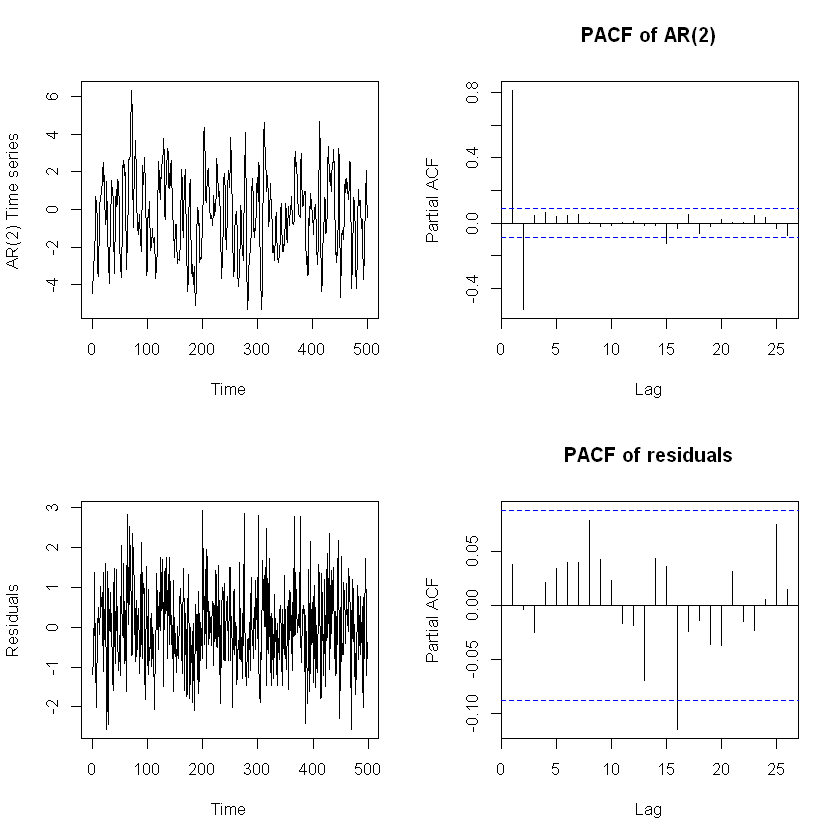

In [29]:
par(mfrow=c(2,2))
ts.plot(ar2,ylab='AR(2) Time series')
pacf(ar2, main='PACF of AR(2)')

ts.plot(model2$residuals,ylab='Residuals')
pacf(model2$residuals, main='PACF of residuals')

The PACF plot for the residuals has all of the bars within the confidence band. Indicating that the PACF is plausibly close to 0 for
all lags, an indication of an AR(0) or a white noise process. Thus, a linear regression provides a good fit for the AR model.

### 1.2 AR(1) model fitted with AR(2) linear regresson

In [32]:
w2=rnorm(1500)
b=0.5
ar1=filter(w2,filter=b, method='recursive')
ar1=ar1[1001:1500]

In [33]:
data3=data.frame(cbind(x1=ar1[1:498],x2=ar1[2:499],y=ar1[3:500]))
model3=lm(y~x1+x2,data=data3)
summary(model3)


Call:
lm(formula = y ~ x1 + x2, data = data3)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2866 -0.6940  0.0403  0.6266  3.2851 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.006957   0.045212  -0.154    0.878    
x1           0.041265   0.044910   0.919    0.359    
x2           0.472413   0.044913  10.518   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.009 on 495 degrees of freedom
Multiple R-squared:  0.2441,	Adjusted R-squared:  0.241 
F-statistic: 79.92 on 2 and 495 DF,  p-value: < 2.2e-16


**Comment:**

The coefficient of $X_2$ is close to 0.5 the true parameter. Onthe other hand, the coefficent for $X_1$ is 0.04 and the p-value is large indicating that this coefficient is plausibly 0. Thus the mode fit suggest an AR(1) model.